In [ ]:
import pandas as pd

# Ler o CSV original
df = pd.read_csv('ST_amostras.csv')

# Função para determinar a classificação antiga (oldClassification)
def get_old_classification(row):
    # Verifica cada coluna de doença e retorna a primeira que for True
    for column in ['1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF', 'normal_ecg']:
        if row[column]:
            return column
    return None  # Retorna None se nenhuma coluna for True

# Cria a nova coluna 'oldClassification' aplicando a função
df['oldClassification'] = df.apply(get_old_classification, axis=1)

# Seleciona apenas as colunas 'exam_id' e 'oldClassification'
df_result = df[['exam_id', 'oldClassification']]

# Salva o resultado em um novo CSV
df_result.to_csv('novo_arquivo.csv', index=False)

print("Novo arquivo CSV criado com sucesso!")


Sucesso: exame ID 777292 salvo em ecg_imagens/777292.png.
Sucesso: exame ID 3055667 salvo em ecg_imagens/3055667.png.
Sucesso: exame ID 1377351 salvo em ecg_imagens/1377351.png.
Sucesso: exame ID 659378 salvo em ecg_imagens/659378.png.
Sucesso: exame ID 3083851 salvo em ecg_imagens/3083851.png.
Sucesso: exame ID 2752941 salvo em ecg_imagens/2752941.png.
Sucesso: exame ID 143713 salvo em ecg_imagens/143713.png.
Sucesso: exame ID 733915 salvo em ecg_imagens/733915.png.
Sucesso: exame ID 1249921 salvo em ecg_imagens/1249921.png.
Sucesso: exame ID 1172334 salvo em ecg_imagens/1172334.png.
Sucesso: exame ID 1830145 salvo em ecg_imagens/1830145.png.
Sucesso: exame ID 1524478 salvo em ecg_imagens/1524478.png.
Sucesso: exame ID 4409371 salvo em ecg_imagens/4409371.png.
Sucesso: exame ID 664817 salvo em ecg_imagens/664817.png.
Sucesso: exame ID 2990622 salvo em ecg_imagens/2990622.png.
Sucesso: exame ID 2777340 salvo em ecg_imagens/2777340.png.
Sucesso: exame ID 1647311 salvo em ecg_imagens/164

KeyboardInterrupt: 

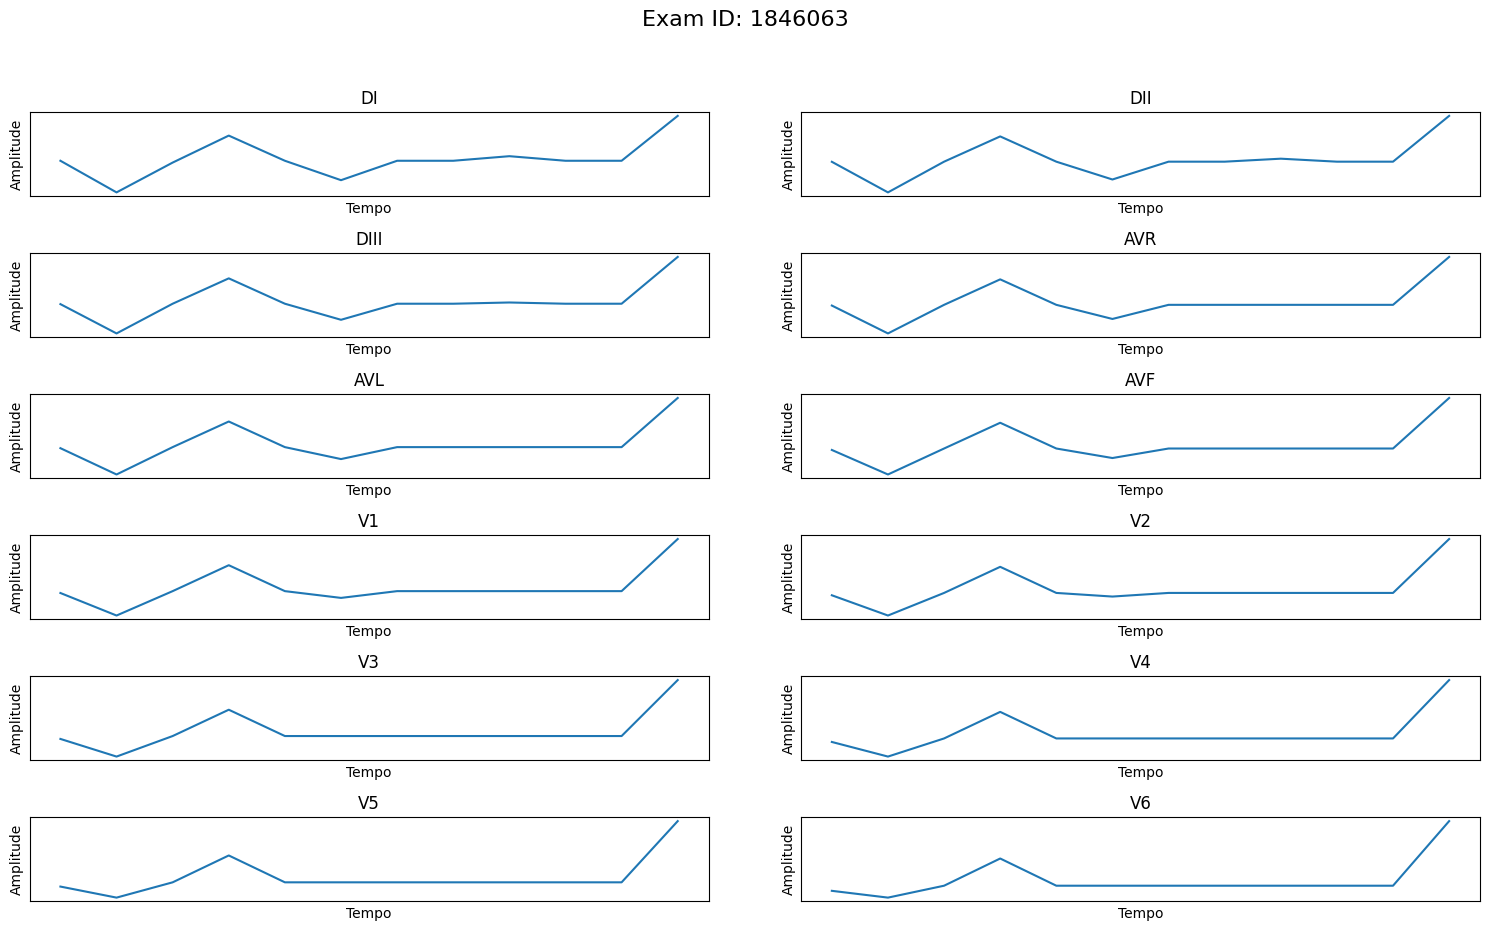

In [2]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os


# Caminhos dos arquivos
csv_path = 'novo_arquivo.csv'  # Substitua pelo caminho do CSV com exam_id e oldClassification
hdf5_paths = [
    '../../Database/filtered_exams_14_15.hdf5',
    '../../Database/filtered_exams_16_17.hdf5',
    '../../Database/filtered_exams_12_13.hdf5',
    '../../Database/filtered_exams_10_11.hdf5',
    '../../Database/filtered_exams_8_9.hdf5',
    '../../Database/filtered_exams_6_7.hdf5',
    '../../Database/filtered_exams_4_5.hdf5',
    '../../Database/filtered_exams_2_3.hdf5',
    '../../Database/filtered_exams_0_1.hdf5'
]
output_folder = 'ecg_imagens'  # Pasta onde salvar as imagens

# Carregar o CSV que contém exam_id e oldClassification
df = pd.read_csv(csv_path)

# Função para obter dados de ECG de um arquivo HDF5
def get_ecg_data(file_paths, exam_id):
    for file_path in file_paths:
        with h5py.File(file_path, 'r') as f:
            exam_ids = np.array(f['exam_id'])
            exam_index = np.where(exam_ids == exam_id)[0]
            if len(exam_index) != 0:
                exam_index = exam_index[0]
                exam_tracings = f['tracings'][exam_index]
                # Transpor os dados do ECG para que as derivações fiquem nas colunas
                ecg = np.array(exam_tracings).T
                return ecg
    raise ValueError(f"Exam ID {exam_id} não encontrado em nenhum dos arquivos fornecidos.")

# Função para plotar e salvar as imagens das derivações de ECG usando matplotlib
def plot_and_save_ecg(exam_id, ecg, output_path):
    # Criar uma figura para as 12 derivações
    plt.figure(figsize=(15, 10))
    plt.suptitle(f'Exam ID: {exam_id}', fontsize=16)
    
    lead_names = ['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
    
    # Plotar cada uma das 12 derivações
    for i in range(12):
        plt.subplot(6, 2, i + 1)  # 6 linhas, 2 colunas
        plt.plot(ecg[:, i])
        plt.title(lead_names[i])
        plt.xlabel('Tempo')
        plt.ylabel('Amplitude')
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        # Remover ticks e labels para uma visualização mais limpa
        plt.tick_params(
            axis='both',
            which='both',
            bottom=False,
            top=False,
            left=False,
            right=False,
            labelleft=False,
            labelbottom=False
        )

    # Salvar a imagem com alta resolução
    image_path = os.path.join(output_path, f'{exam_id}.png')
    plt.savefig(image_path, dpi=550)
    plt.close()
    print(f"Sucesso: exame ID {exam_id} salvo em {image_path}.")

# Garantir que a pasta de saída existe
os.makedirs(output_folder, exist_ok=True)

# Iterar sobre cada linha do DataFrame e gerar as imagens apenas dos exam_id presentes no CSV
for _, row in df.iterrows():
    exam_id = row['exam_id']
    try:
        # Obter os dados de ECG do HDF5
        ecg_data = get_ecg_data(hdf5_paths, exam_id)
        # Salvar a imagem do ECG
        plot_and_save_ecg(exam_id, ecg_data, output_folder)
    except ValueError as e:
        print(e)
    except Exception as e:
        print(f"Erro ao processar o exam ID {exam_id}: {e}")

print("Imagens geradas com sucesso!")